## 인구 분포를 활용한 실습

In [1]:
import csv
f = open('age.csv', encoding='euc-kr')
data = csv.reader(f)

header = next(data)
print(header)

# 경북대 주변 산격 3동의 인구수 데이터만 읽기
for row in data:
    if '산격3' in row[0]:
        print(row)
f.close()

['행정구역', '2022년06월_계_총인구수', '2022년06월_계_연령구간인구수', '2022년06월_계_0세', '2022년06월_계_1세', '2022년06월_계_2세', '2022년06월_계_3세', '2022년06월_계_4세', '2022년06월_계_5세', '2022년06월_계_6세', '2022년06월_계_7세', '2022년06월_계_8세', '2022년06월_계_9세', '2022년06월_계_10세', '2022년06월_계_11세', '2022년06월_계_12세', '2022년06월_계_13세', '2022년06월_계_14세', '2022년06월_계_15세', '2022년06월_계_16세', '2022년06월_계_17세', '2022년06월_계_18세', '2022년06월_계_19세', '2022년06월_계_20세', '2022년06월_계_21세', '2022년06월_계_22세', '2022년06월_계_23세', '2022년06월_계_24세', '2022년06월_계_25세', '2022년06월_계_26세', '2022년06월_계_27세', '2022년06월_계_28세', '2022년06월_계_29세', '2022년06월_계_30세', '2022년06월_계_31세', '2022년06월_계_32세', '2022년06월_계_33세', '2022년06월_계_34세', '2022년06월_계_35세', '2022년06월_계_36세', '2022년06월_계_37세', '2022년06월_계_38세', '2022년06월_계_39세', '2022년06월_계_40세', '2022년06월_계_41세', '2022년06월_계_42세', '2022년06월_계_43세', '2022년06월_계_44세', '2022년06월_계_45세', '2022년06월_계_46세', '2022년06월_계_47세', '2022년06월_계_48세', '2022년06월_계_49세', '2022년06월_계_50세', '2022년06월_계_51세', '2022년06월_계_52세', '2022년

In [2]:
# 산격3동의 인구 데이터 list로 저장
f = open('age.csv', encoding='euc-kr')
data = csv.reader(f)
result = []
for row in data:
    if '산격3' in row[0]:
        for data in row[3:]:
            result.append(data)
print(result)
f.close()

['13', '9', '19', '26', '22', '26', '24', '35', '16', '33', '30', '38', '37', '31', '38', '40', '35', '49', '127', '179', '193', '250', '345', '371', '351', '339', '298', '268', '231', '226', '205', '161', '158', '123', '90', '87', '81', '85', '75', '83', '106', '87', '112', '100', '68', '98', '92', '105', '117', '115', '109', '104', '131', '117', '114', '137', '124', '116', '108', '133', '120', '171', '158', '127', '135', '109', '129', '118', '102', '107', '103', '79', '98', '95', '84', '82', '44', '67', '55', '74', '46', '53', '61', '35', '39', '32', '39', '19', '18', '12', '10', '12', '8', '9', '2', '3', '0', '3', '0', '0', '1']


## 인구 분포를 활용해 그래프 그리기

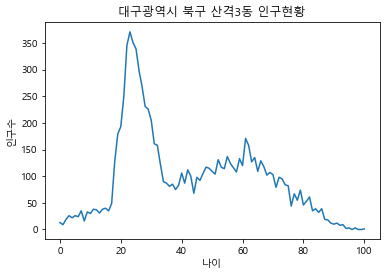

In [3]:
# 대구광역시 북구 산격3동 인구현황

import re
import platform
import matplotlib.pyplot as plt

with open('age.csv', encoding='euc-kr', mode='r') as f:
    data = csv.reader(f)
    result = []
    city = ''
    for row in data:
        if '산격3동' in row[0]:
            city_str = re.split('[()]', row[0])
            city = city_str[0]
            for data in row[3:]:
                result.append(int(data))
                
if platform.system() == 'Windows':    # 폰트 깨짐 방지
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')
    
plt.title(f'{city} 인구현황')
plt.xlabel('나이')
plt.ylabel('인구수')
plt.style.use('ggplot')    # R에서 사용하는 ggplot 패키지 형태
plt.plot(result)
plt.show()

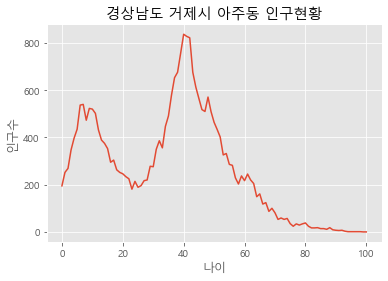

In [4]:
# 거제시 아주동 인구현황

import re
import platform
import matplotlib.pyplot as plt

with open('age.csv', encoding='euc-kr', mode='r') as f:
    data = csv.reader(f)
    result = []
    city = ''
    for row in data:
        if '아주동' in row[0]:
            city_str = re.split('[()]', row[0])
            city = city_str[0]
            for data in row[3:]:
                result.append(int(data))
                
if platform.system() == 'Windows':    # 폰트 깨짐 방지
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')
    
plt.title(f'{city} 인구현황')
plt.xlabel('나이')
plt.ylabel('인구수')
plt.style.use('ggplot')
plt.plot(result)
plt.show()

## 정규식을 사용한 문자열 분리
- import re, re.split(패턴, 문자열, [최대분할개수, 대괄호 생략가능])

In [5]:
# 예제
import re

string = 'apple orange:banana,tomato;melon'

fruits = re.split('[ ,:;]',string)    # 구분자 여러개 가능.
fruits_2 = re.split('[ ,:;]',string,2)
fruits_3 = string.split(' ')    # 구분자를 하나로만 둘 수 있다.
print(fruits, fruits_2, fruits_3, sep='\n')

['apple', 'orange', 'banana', 'tomato', 'melon']
['apple', 'orange', 'banana,tomato;melon']
['apple', 'orange:banana,tomato;melon']


## 인구 분포 그래프 함수 구현 : 동이름 입력

In [6]:
import csv
import matplotlib.pyplot as plt
import platform
import matplotlib.font_manager as fm
import re

# '행정구역' 명칭에서 괄호안의 숫자 부분을 제거하고 표시한다
# ex) 서울특별시 종로구 (1111000000) => 서울특별시 종로구
def parse_district_name(district):
    district_name = re.split('[()]', district)
    return district_name[0]
    
# 행정구역의 인구 현황을 print 함수로 화면에 출력한다
def print_pop(pop):
    for i in range(len(pop)):
        print(f'{i}세 : {pop[i]}명 ', end='')
        # 10개 단위로 끊어줌
        if (i+1) % 10 == 0:
            print()

# 그래프 시각화 함수
def draw_pop_graph(district, pop_list):
    if platform.system() == 'Windows':
        font_name = fm.FontProperties(fname="c:\Windows\Fonts\malgun.ttf").get_name()
        plt.rc('font', family=font_name)
    else:
        plt.rc('font', family='AppleGothic')
    plt.figure(figsize=(10,5))
    plt.style.use('ggplot')
    plt.title('{} 인구 현황'.format(district))
    plt.xlabel('나이')
    plt.ylabel('인구수')
    plt.bar(range(101), pop_list)
    plt.xticks(range(0, 101, 10)) # 0세 ~ 100세 이상
    plt.plot(pop_list)
    plt.show()
    
# 특정 행정구역의 인구 현황 읽기 및 화면출력 / 그래프 표현
def get_pop(district):
    with open('age.csv', mode='r', encoding='euc-kr') as f:
        data = csv.reader(f)
        next(data)    # 헤더 정보 건너뜀

        pop_list = []
        full_district_name = ''
        for row in data:
            if district in row[0]:
                full_district_name = parse_district_name(row[0]) # (시 구 동) 이름만 분리
                for data in row[3:]:
                    if ',' in data:
                        data = data.replace(',','') # 천단위 콤마 제거
                    pop_list.append(int(data))
    print(f'[{full_district_name}의 인구현황]')
    print_pop(pop_list)
    draw_pop_graph(district, pop_list)
            

인구 구조를 알고 싶은 지역의 이름(읍면동 단위)을 입력하세요: 아주동
[경상남도 거제시 아주동의 인구현황]
0세 : 195명 1세 : 252명 2세 : 269명 3세 : 347명 4세 : 397명 5세 : 435명 6세 : 537명 7세 : 540명 8세 : 473명 9세 : 523명 
10세 : 520명 11세 : 502명 12세 : 432명 13세 : 389명 14세 : 375명 15세 : 353명 16세 : 295명 17세 : 304명 18세 : 263명 19세 : 252명 
20세 : 246명 21세 : 234명 22세 : 225명 23세 : 181명 24세 : 214명 25세 : 189명 26세 : 196명 27세 : 217명 28세 : 220명 29세 : 278명 
30세 : 276명 31세 : 350명 32세 : 386명 33세 : 356명 34세 : 447명 35세 : 491명 36세 : 579명 37세 : 653명 38세 : 676명 39세 : 756명 
40세 : 837명 41세 : 828명 42세 : 822명 43세 : 676명 44세 : 613명 45세 : 565명 46세 : 518명 47세 : 510명 48세 : 571명 49세 : 509명 
50세 : 464명 51세 : 434명 52세 : 402명 53세 : 326명 54세 : 332명 55세 : 286명 56세 : 282명 57세 : 229명 58세 : 203명 59세 : 237명 
60세 : 217명 61세 : 245명 62세 : 220명 63세 : 205명 64세 : 149명 65세 : 161명 66세 : 118명 67세 : 124명 68세 : 87명 69세 : 100명 
70세 : 81명 71세 : 53명 72세 : 59명 73세 : 53명 74세 : 57명 75세 : 35명 76세 : 24명 77세 : 34명 78세 : 29명 79세 : 34명 
80세 : 38명 81세 : 24명 82세 : 17명 83세 : 17명 84세 : 18명 85세 : 14명 86세 : 14명 87

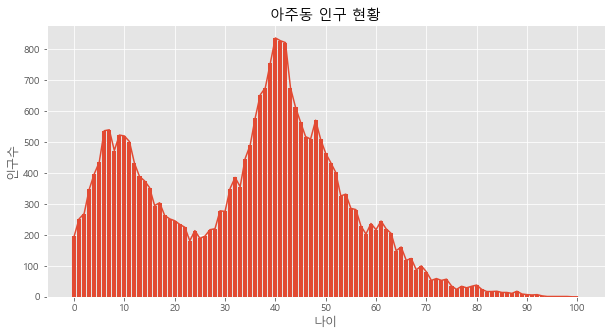

In [7]:
district = input('인구 구조를 알고 싶은 지역의 이름(읍면동 단위)을 입력하세요: ')
get_pop(district)

## 투표 가능 인구수 분석

In [8]:
# 도시 이름에서 코드 번호 제거
def parse_district_name(district):
    district_name = re.split('[()]', district)
    return district_name[0]

# 파이차트 표현
def draw_piechart(city_name, city_pop, voting_pop):
    non_voting_pop = city_pop - voting_pop
    pop = [non_voting_pop, voting_pop]
    if platform.system() == 'Windows':
        plt.rc('font', family='Malgun Gothic')
    else:
        plt.rc('font', family='AppleGothic')
    
    colors = ['tomato', 'royalblue']
    plt.pie(pop, labels=['투표 불가(18세 미만)','투표 가능'], autopct='%.2f%%',
           colors=colors, startangle=90)
    plt.legend()
    plt.title(city_name + '의 투표 가능 인구 비율')
    plt.show()
    
# 투표 가능 인구수 구하기
def get_voting_pop(district):
    with open('age.csv', mode='r', encoding='euc-kr') as f:
        data = csv.reader(f)
        header = next(data)
        city_name = ''
        city_pop = 0
        voting_pop = 0
        for row in data:
            if district in row[0]:
                city_pop = row[1]
                if ',' in city_pop:
                    city_pop = city_pop.replace(',','')
                city_pop = int(city_pop)
                for data in row[21:]:
                    if ',' in data:
                        data = data.replace(',','')
                    voting_num = int(data)
                    voting_pop += voting_num
                break
    draw_piechart(district, city_pop, voting_pop)

투표 가능 인구수를 확인할 도시이름을 입력하시오: 아주동


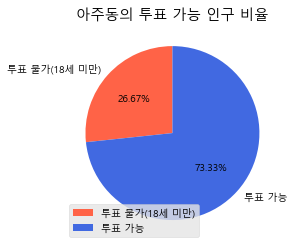

In [9]:
city = input('투표 가능 인구수를 확인할 도시이름을 입력하시오: ')
get_voting_pop(city)

## 성별별 인구수 현황 : 수평 막대 그래프

In [10]:
with open('gender.csv', mode='r', encoding='euc-kr') as f:
    data = csv.reader(f)
    header = next(data)
    for i in range(len(header)):
        print('[{0:4d}]: {1}'.format(i, header[i]), end=', ')
        if (i+1) % 5 == 0:
            print()

[   0]: 행정구역, [   1]: 2022년06월_계_총인구수, [   2]: 2022년06월_계_연령구간인구수, [   3]: 2022년06월_계_0세, [   4]: 2022년06월_계_1세, 
[   5]: 2022년06월_계_2세, [   6]: 2022년06월_계_3세, [   7]: 2022년06월_계_4세, [   8]: 2022년06월_계_5세, [   9]: 2022년06월_계_6세, 
[  10]: 2022년06월_계_7세, [  11]: 2022년06월_계_8세, [  12]: 2022년06월_계_9세, [  13]: 2022년06월_계_10세, [  14]: 2022년06월_계_11세, 
[  15]: 2022년06월_계_12세, [  16]: 2022년06월_계_13세, [  17]: 2022년06월_계_14세, [  18]: 2022년06월_계_15세, [  19]: 2022년06월_계_16세, 
[  20]: 2022년06월_계_17세, [  21]: 2022년06월_계_18세, [  22]: 2022년06월_계_19세, [  23]: 2022년06월_계_20세, [  24]: 2022년06월_계_21세, 
[  25]: 2022년06월_계_22세, [  26]: 2022년06월_계_23세, [  27]: 2022년06월_계_24세, [  28]: 2022년06월_계_25세, [  29]: 2022년06월_계_26세, 
[  30]: 2022년06월_계_27세, [  31]: 2022년06월_계_28세, [  32]: 2022년06월_계_29세, [  33]: 2022년06월_계_30세, [  34]: 2022년06월_계_31세, 
[  35]: 2022년06월_계_32세, [  36]: 2022년06월_계_33세, [  37]: 2022년06월_계_34세, [  38]: 2022년06월_계_35세, [  39]: 2022년06월_계_36세, 
[  40]: 2022년06월_계_37세, [  41]: 2022년06월_계_38세,

In [11]:
import csv
import matplotlib.pyplot as plt
import platform

# 인구 현황 print 함수
def print_population(population):
    for i in range(len(population)):
        print('{0:3d}세:{1:5d}명'.format(i, abs(population[i])), end='')
        if (i + 1) % 7 == 0:
            print()
    print()
    
# 그래프 시각화
def draw_geneder_population(male_num_list, female_num_list):
    if platform.system() == 'Windows':
        plt.rc('font', family='Malgun Gothic')
    else:
        plt.rc('font', family='AppleGothic')
    # barh(y축 범위, data)
    plt.figure(figsize=(13,9))
    plt.barh(range(len(male_num_list)), male_num_list, label='남성')
    plt.barh(range(len(female_num_list)), female_num_list, label='여성')
    plt.rcParams['axes.unicode_minus'] = False
    plt.style.use('ggplot')
    plt.legend()
    plt.show()

지역(동) 이름을 입력하세요: 아주동
남성 총인구수:  14313
  0세:   94명  1세:  128명  2세:  139명  3세:  169명  4세:  202명  5세:  237명  6세:  263명
  7세:  273명  8세:  264명  9세:  281명 10세:  255명 11세:  256명 12세:  239명 13세:  201명
 14세:  186명 15세:  192명 16세:  160명 17세:  149명 18세:  128명 19세:  141명 20세:  129명
 21세:  134명 22세:  133명 23세:   98명 24세:  103명 25세:  113명 26세:  108명 27세:  139명
 28세:  130명 29세:  149명 30세:  143명 31세:  171명 32세:  207명 33세:  179명 34세:  216명
 35세:  241명 36세:  296명 37세:  339명 38세:  341명 39세:  432명 40세:  488명 41세:  455명
 42세:  458명 43세:  391명 44세:  355명 45세:  306명 46세:  275명 47세:  269명 48세:  321명
 49세:  288명 50세:  276명 51세:  254명 52세:  236명 53세:  182명 54세:  186명 55세:  173명
 56세:  172명 57세:  118명 58세:  112명 59세:  118명 60세:  109명 61세:  115명 62세:  106명
 63세:  118명 64세:   86명 65세:   88명 66세:   70명 67세:   57명 68세:   46명 69세:   52명
 70세:   35명 71세:   31명 72세:   27명 73세:   35명 74세:   27명 75세:   18명 76세:   14명
 77세:    9명 78세:   14명 79세:   11명 80세:   14명 81세:    7명 82세:    4명 83세:    6명
 84세:    2명 85세:    4명 86세:

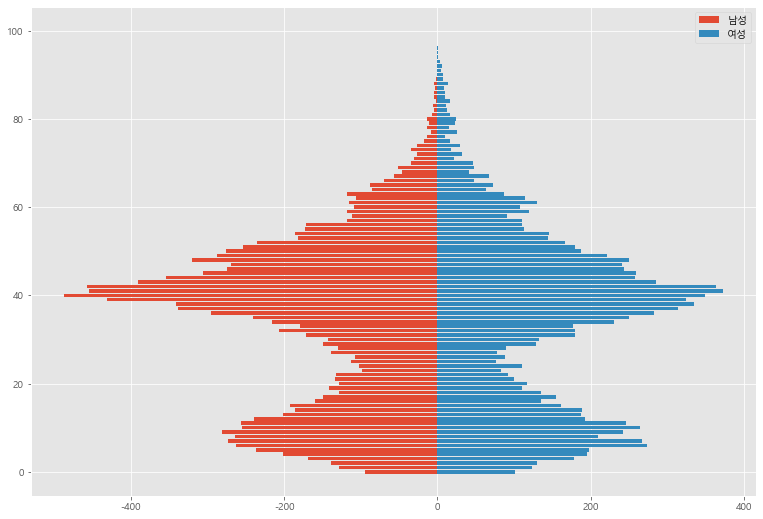

In [12]:
def calculate_population():
    with open('gender.csv', mode='r', encoding='euc-kr') as f:
        data = csv.reader(f)
        male_num_list = []
        female_num_list = []
        district = input('지역(동) 이름을 입력하세요: ')
        for row in data:
            if district in row[0]:
                for male in row[106:207]: # 남성 연령별 인구수 구간[106:206]
                    if ',' in male:
                        male = male.replace(',', '') # 천단위 콤마 제거
                    # 그래프 모양을 위해 음수로 저장함.
                    male_num_list.append(-int(male))    
                for female in row[209:310]: # 여성 연령별 인구수 구간[209:309]
                    if ',' in female:
                        female = female.replace(',', '')
                    female_num_list.append(int(female))
                break
        f.close()
        print('남성 총인구수: ', abs(sum(male_num_list)))
        print_population(male_num_list)
        print(f'{"-=" * 45}')
        print('여성 총인구수: ', sum(female_num_list))
        print_population(female_num_list)
        print(f'{"-=" * 45}')
        print(f'전체 인구수 : {abs(sum(male_num_list)) + sum(female_num_list)}')
        draw_geneder_population(male_num_list, female_num_list)
calculate_population()

## 여러 그래프를 한번에 그리기 : subplots 실습

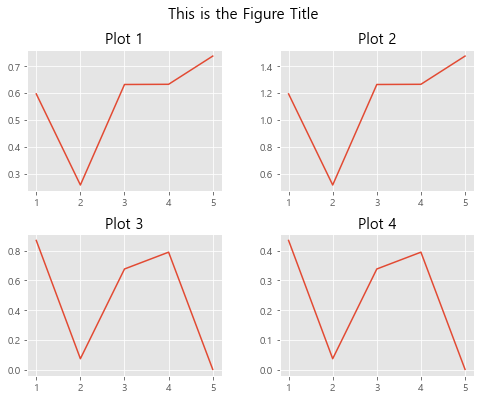

In [13]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5]
y1 = [0.59705847, 0.25786401, 0.63213726, 0.63287317, 0.73791151]
y2 = [1.19411694, 0.51572803, 1.26427451, 1.26574635, 1.47582302]
y3 = [0.86793828, 0.07563408, 0.67670068, 0.78932712, 0.0043694]
y4 = [0.43396914, 0.03781704, 0.33835034, 0.39466356, 0.0021847]

# 전체 subplot의 개수 설정 (2 x 2= 총 4개)
fig, axes = plt.subplots(2, 2, figsize=(8, 6), sharex=False, sharey=False)

# 전체 그래프의 타이틀 설정
fig.suptitle('This is the Figure Title', fontsize=15)
fig.subplots_adjust(hspace=0.3, wspace=0.3)

# Top Left Subplot
plt.subplot(2,2,1)
plt.plot(x,y1)
plt.title("Plot 1")
# axes[0,0].plot(x, y1)
# axes[0,0].set_title("Plot 1")

# Top Right Subplot
plt.subplot(2,2,2)
plt.plot(x,y2)
plt.title("Plot 2")
# axes[0,1].plot(x, y2)
# axes[0,1].set_title("Plot 2")

# Bottom Left Subplot
plt.subplot(2,2,3)
plt.plot(x,y3)
plt.title("Plot 3")
# axes[1,0].plot(x, y3)
# axes[1,0].set_title("Plot 3")

# Bottom Right Subplot
plt.subplot(2,2,4)
plt.plot(x,y4)
plt.title("Plot 4")
# axes[1,1].plot(x, y4)
# axes[1,1].set_title("Plot 4")

plt.show()

## 지역별/나이별 인구 현황 : 꺾은 선 그래프

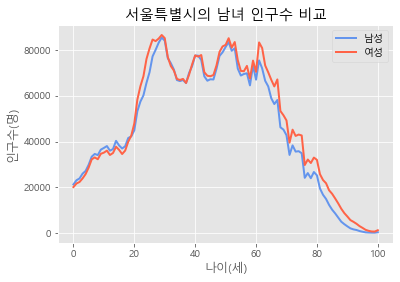

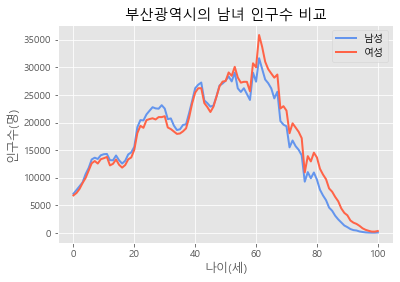

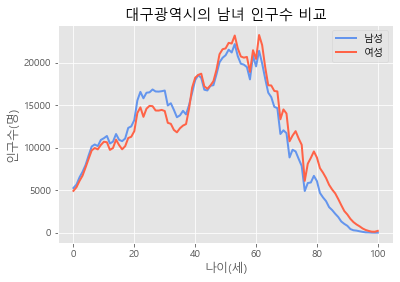

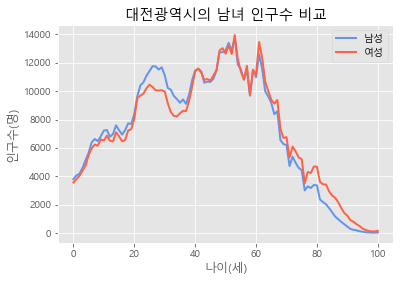

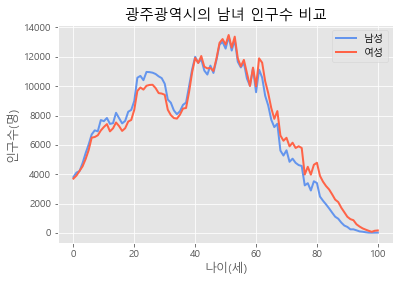

In [36]:
import csv
import matplotlib.pyplot as plt
import platform

with open('gender.csv', mode='r', encoding='euc-kr') as f:
    data = csv.reader(f)
    city_list = ['서울특별시','부산광역시','대구광역시','대전광역시','광주광역시']
    for city in city_list:
        male_list = []
        female_list = []
        for row in data:
            if city in row[0]:
                for i in range(106, 207):
                    male_list.append(int(row[i].replace(',','')))
                    female_list.append(int(row[i+103].replace(',','')))
                    f.seek(0)    # 커서 위치 초기화
                break # 도시 하위 목록이 많음. 처음에 나오는 데이터가 전체 총합
        if platform.system() == 'Windows':
            plt.rc('font', family='Malgun Gothic')
        else:
            plt.rc('font', family='AppleGothic')
        color = ['cornflowerblue', 'tomato']
        plt.plot(male_list, label='남성', color=color[0])
        plt.rcParams['lines.linewidth'] = 2    # rcParams를 이용한 라인 굵기 지정
        plt.plot(female_list, label='여성', color=color[1])
        plt.rcParams['lines.linewidth'] = 2
        plt.title(city + "의 남녀 인구수 비교")
        plt.xlabel('나이(세)')
        plt.ylabel('인구수(명)')
        plt.legend()
        plt.show()

## 산점도(scatter)로 표현하기

찾고 싶은 지역의 이름을 입력하세요: 거제시


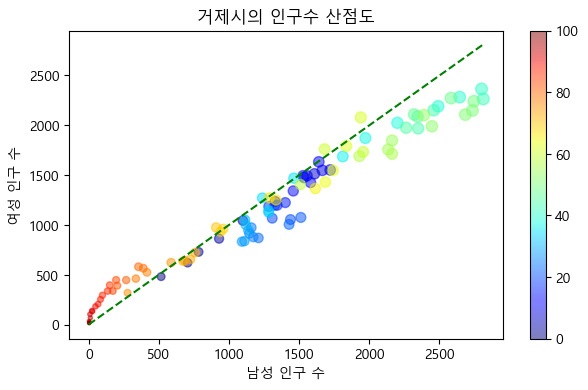

In [66]:
import csv
import matplotlib.pyplot as plt
import platform
import math

with open('gender.csv', mode='r', encoding='euc-kr') as f:
    data = csv.reader(f)
    male_list = []
    female_list = []
    bubble_size_list = []
    city = input('찾고 싶은 지역의 이름을 입력하세요: ')
    for row in data:
        if city in row[0]:
            for i in range(106, 207):
                male_num = int(row[i].replace(',',''))
                female_num = int(row[i + 103].replace(',',''))
                bubble_size_list.append(math.sqrt(male_num + female_num))
                male_list.append(int(row[i].replace(',','')))
                female_list.append(int(row[i+103].replace(',','')))
                f.seek(0)    # 커서 위치 초기화
            break # 도시 하위 목록이 많음. 처음에 나오는 데이터가 전체 총합
    if platform.system() == 'Windows':
        plt.rc('font', family='Malgun Gothic')
    else:
        plt.rc('font', family='AppleGothic')
    plt.figure(figsize=(7,4))
    plt.scatter(male_list, female_list, s=bubble_size_list, c=range(101),alpha=0.5, cmap='jet')
    plt.colorbar()
    plt.plot(range(max(male_list)), range(max(male_list)), 'g--')
    plt.title(city + '의 인구수 산점도')
    plt.xlabel('남성 인구 수')
    plt.ylabel('여성 인구 수')
    plt.style.use('default')
    plt.show()